Last Checkpoint: 08/30/2021

# neuralnet, knn, svm

In [1]:
library(caret)
library(MASS)
library(neuralnet)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'neuralnet' was built under R version 3.6.3"

ERROR: Error in library(vcd): there is no package called 'vcd'


In [5]:
install.packages("vcd")
library(vcd)

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmpc5M5zu\downloaded_packages


Warning message:
"package 'vcd' was built under R version 3.6.3"Loading required package: grid


In [6]:
data(shuttle)
str(shuttle)
table(shuttle$use)

'data.frame':	256 obs. of  7 variables:
 $ stability: Factor w/ 2 levels "stab","xstab": 2 2 2 2 2 2 2 2 2 2 ...
 $ error    : Factor w/ 4 levels "LX","MM","SS",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sign     : Factor w/ 2 levels "nn","pp": 2 2 2 2 2 2 1 1 1 1 ...
 $ wind     : Factor w/ 2 levels "head","tail": 1 1 1 2 2 2 1 1 1 2 ...
 $ magn     : Factor w/ 4 levels "Light","Medium",..: 1 2 4 1 2 4 1 2 4 1 ...
 $ vis      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ use      : Factor w/ 2 levels "auto","noauto": 1 1 1 1 1 1 1 1 1 1 ...



  auto noauto 
   145    111 

In [7]:
table1 <- structable(wind + magn ~ use, shuttle)   #vcd
table1

       wind  head                    tail                  
       magn Light Medium Out Strong Light Medium Out Strong
use                                                        
auto           19     19  16     18    19     19  16     19
noauto         13     13  16     14    13     13  16     13

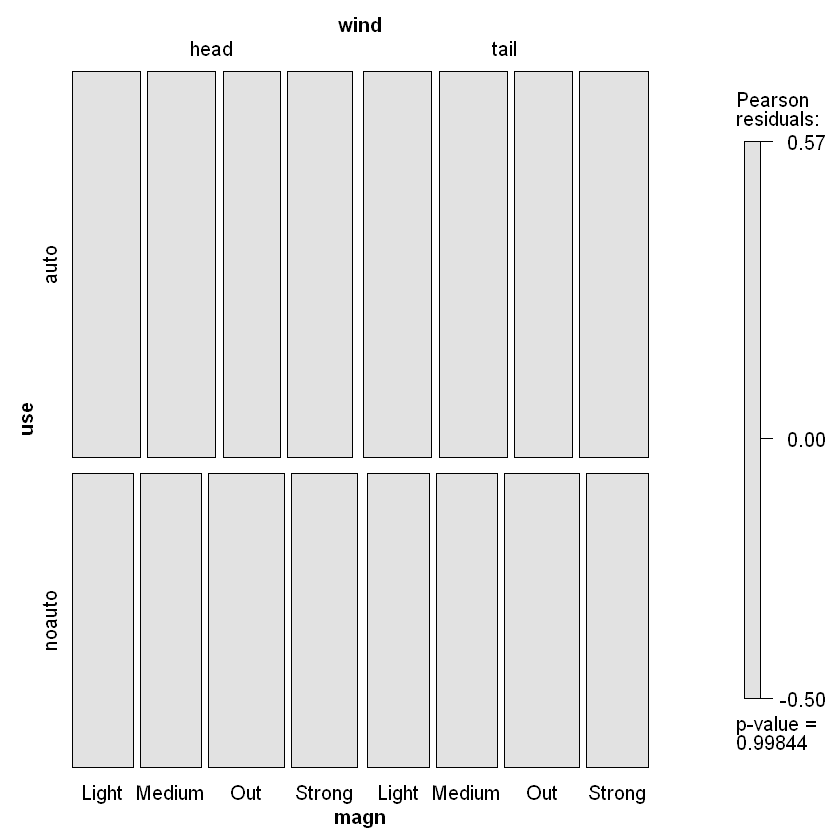

In [11]:
mosaic(table1, shade = T) # 피값 유의하지 않음 -> 기각x-> 독립임.

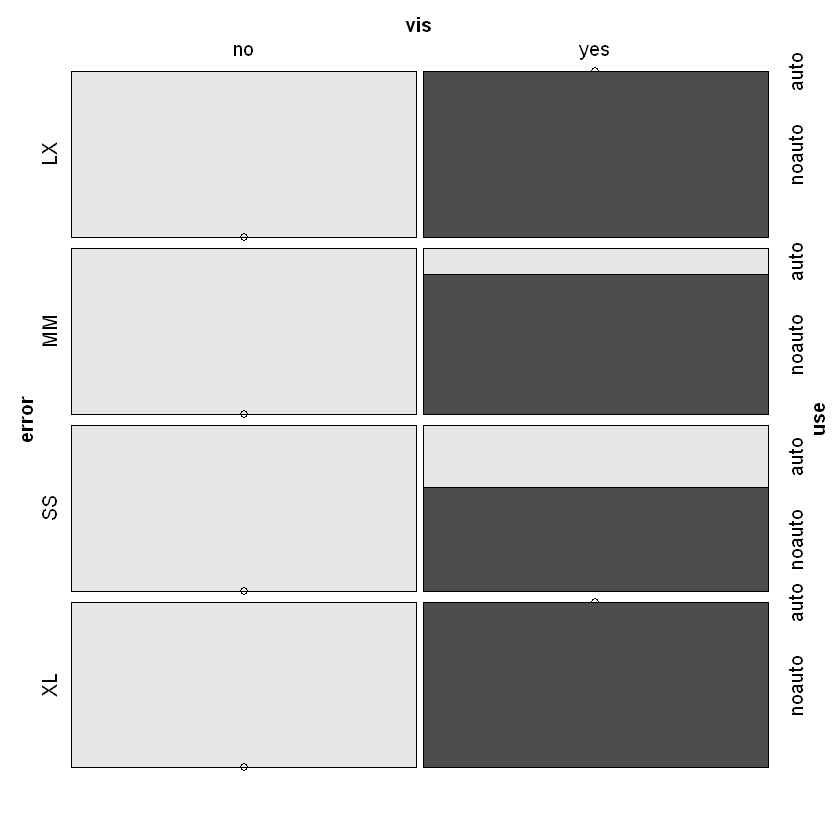

In [12]:
mosaic(use ~ error + vis, shuttle) #귀무가설 기각-> 종속

In [16]:
table(shuttle$use, shuttle$stability)
prop.table( table(shuttle$use, shuttle$stability) ) 

        
         stab xstab
  auto     81    64
  noauto   47    64

        
              stab     xstab
  auto   0.3164062 0.2500000
  noauto 0.1835938 0.2500000

In [17]:
chisq.test(shuttle$use, shuttle$stability)


	Pearson's Chi-squared test with Yates' continuity correction

data:  shuttle$use and shuttle$stability
X-squared = 4.0718, df = 1, p-value = 0.0436


In [23]:
#신경망 모두 수치형이여야함 -> 더미로 변환
dummies <- dummyVars (use ~. ,shuttle, fullRank = T)    #caret
dummies

Dummy Variable Object

Formula: use ~ .
7 variables, 7 factors
Variables and levels will be separated by '.'
A full rank encoding is used

In [26]:
shuttle2<-data.frame(predict(dummies, newdata= shuttle))
head(shuttle2)
names(shuttle2)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'use' is not a factor"

stability.xstab,error.MM,error.SS,error.XL,sign.pp,wind.tail,magn.Medium,magn.Out,magn.Strong,vis.yes
1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0
1,0,0,0,1,0,0,0,1,0
1,0,0,0,1,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0
1,0,0,0,1,1,0,0,1,0


[1] "stability.xstab" "error.MM"        "error.SS"        "error.XL"       
 [5] "sign.pp"         "wind.tail"       "magn.Medium"     "magn.Out"       
 [9] "magn.Strong"     "vis.yes"

In [28]:
shuttle2$use<- ifelse(shuttle$use=="auto", 1, 0)
table(shuttle2$use)


  0   1 
111 145 

In [31]:
set.seed(123)
idx<-createDataPartition(shuttle2$use, p=0.7, list=F)
train<-shuttle2[idx,]
test<-shuttle2[-idx,]

In [33]:
n <- names(train)
form <- as.formula(paste("use ~", paste(n[!n %in% "use"], collapse = " + ")))
form

use ~ stability.xstab + error.MM + error.SS + error.XL + sign.pp + 
    wind.tail + magn.Medium + magn.Out + magn.Strong + vis.yes

In [36]:
set.seed(1)
fit<-neuralnet(use~. , train, hidden=c(2,1), err.fct="ce", linear.output=F)
fit$result.matrix

error,0.006745424
reached.threshold,0.008028217
steps,251.000000000
Intercept.to.1layhid1,-2.913396291
stability.xstab.to.1layhid1,1.061971240
error.MM.to.1layhid1,-1.507105083
error.SS.to.1layhid1,-1.960491707
error.XL.to.1layhid1,-0.557518418
sign.pp.to.1layhid1,-0.362270154
wind.tail.to.1layhid1,-0.093003853
magn.Medium.to.1layhid1,0.012907060


In [43]:
head(  fit$ generalized.weights[[1]]  ) 

1,-0.0058040120,0.0022578370,0.0061042939,2.793278e-05,0.0018809227,0.0022094031,1.855860e-04,-0.0053538239,2.417218e-04,-0.016392872
4,-0.0007663366,0.0003444101,0.0008416829,2.706483e-05,0.0002491154,0.0002785484,2.252078e-05,-0.0007127678,1.914664e-05,-0.002234323
5,-0.0006637593,0.0003076139,0.0007361950,2.814040e-05,0.0002159244,0.0002386163,1.910769e-05,-0.0006185411,1.401738e-05,-0.001949295
6,-0.0007314225,0.0004031544,0.0008607337,6.341801e-05,0.0002389983,0.0002446797,1.830607e-05,-0.0006897356,-2.256756e-06,-0.002244884
7,-0.0444148565,0.0195765927,0.0484852322,1.374447e-03,0.0144317093,0.0162533313,1.321717e-03,-0.0412613771,1.215746e-03,-0.128915111
8,-0.0367735469,0.0164391436,0.0403214453,1.254416e-03,0.0119526383,0.0133914379,1.084446e-03,-0.0341918523,9.429830e-04,-0.107084095


In [37]:
head(fit$generalized.weights[[1]])

1,-0.0058040120,0.0022578370,0.0061042939,2.793278e-05,0.0018809227,0.0022094031,1.855860e-04,-0.0053538239,2.417218e-04,-0.016392872
4,-0.0007663366,0.0003444101,0.0008416829,2.706483e-05,0.0002491154,0.0002785484,2.252078e-05,-0.0007127678,1.914664e-05,-0.002234323
5,-0.0006637593,0.0003076139,0.0007361950,2.814040e-05,0.0002159244,0.0002386163,1.910769e-05,-0.0006185411,1.401738e-05,-0.001949295
6,-0.0007314225,0.0004031544,0.0008607337,6.341801e-05,0.0002389983,0.0002446797,1.830607e-05,-0.0006897356,-2.256756e-06,-0.002244884
7,-0.0444148565,0.0195765927,0.0484852322,1.374447e-03,0.0144317093,0.0162533313,1.321717e-03,-0.0412613771,1.215746e-03,-0.128915111
8,-0.0367735469,0.0164391436,0.0403214453,1.254416e-03,0.0119526383,0.0133914379,1.084446e-03,-0.0341918523,9.429830e-04,-0.107084095


In [44]:
plot(fit)

In [46]:
?gwplot   

gwplot {neuralnet},R Documentation
x,an object of class nn
rep,"an integer indicating the repetition to plot. If rep=""best"", the repetition with the smallest error will be plotted. If not stated all repetitions will be plotted."
max,"maximum of the y axis. In default, max is set to the highest y-value."
min,"minimum of the y axis. In default, min is set to the smallest y-value."
file,"a character string naming the plot to write to. If not stated, the plot will not be saved."
selected.covariate,"either a string of the covariate's name or an integer of the ordered covariates, indicating the reference covariate in the generalized weights plot. Defaulting to the first covariate."
selected.response,"either a string of the response variable's name or an integer of the ordered response variables, indicating the reference response in the generalized weights plot. Defaulting to the first response variable."
highlight,"a logical value, indicating whether to highlight (red color) the best repetition (smallest error). Only reasonable if rep=NULL. Default is FALSE"
type,a character indicating the type of plotting; actually any of the types as in plot.default.
col,a color of the generalized weights.


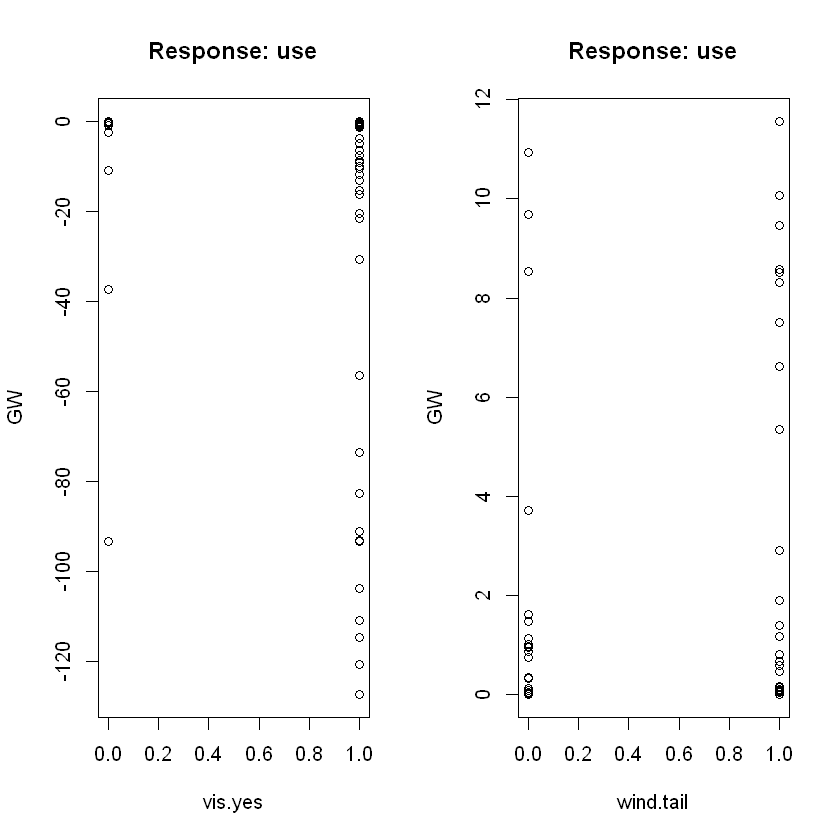

In [45]:

par(mfrow=c(1,2))
gwplot(fit, selected.covariate = "vis.yes")   #neuralnet
gwplot(fit, selected.covariate = "wind.tail")

In [49]:
resultsTrain <- compute(fit, train[, 1:10])

In [50]:
predTrain <- resultsTrain$net.result
predTrain <- ifelse(predTrain >= 0.5, 1, 0)
table(predTrain, train$use)


         
predTrain   0   1
        0  73   0
        1   0 107

In [53]:
resultsTest <- compute(fit, test[,1:10])
predTest <- resultsTest$net.result
predTest <- ifelse(predTest >= 0.5, 1, 0)
table(predTest, test$use)

        
predTest  0  1
       0 38  2
       1  0 36

In [54]:
which(predTest ==0 & test$use ==1)

[1] 58 59

In [55]:
test[58,]

,stability.xstab,error.MM,error.SS,error.XL,sign.pp,wind.tail,magn.Medium,magn.Out,magn.Strong,vis.yes,use
201,0,1,0,0,1,0,0,0,0,1,1


In [ ]:
which(predTest == 1 & shuttleTest$use == 0)
shuttleTest[62,]


In [56]:
if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }
if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

In [57]:
# Next, we download packages that H2O depends on.
if (! ("methods" %in% rownames(installed.packages()))) { install.packages("methods") }
if (! ("statmod" %in% rownames(installed.packages()))) { install.packages("statmod") }
if (! ("stats" %in% rownames(installed.packages()))) { install.packages("stats") }
if (! ("graphics" %in% rownames(installed.packages()))) { install.packages("graphics") }
if (! ("RCurl" %in% rownames(installed.packages()))) { install.packages("RCurl") }
if (! ("jsonlite" %in% rownames(installed.packages()))) { install.packages("jsonlite") }
if (! ("tools" %in% rownames(installed.packages()))) { install.packages("tools") }
if (! ("utils" %in% rownames(installed.packages()))) { install.packages("utils") }

package 'statmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmpc5M5zu\downloaded_packages

  There is a binary version available but the source version is later:
        binary   source needs_compilation
RCurl 1.98-1.3 1.98-1.4              TRUE

  Binaries will be installed
package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmpc5M5zu\downloaded_packages


In [58]:
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-tverberg/5/R")))
library(h2o)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc



In [59]:
setwd("C:/Users/alsdu/Downloads/MasteringMachineLearningwithRSecondEdition_Code/MasteringMachineLearningwithRSecondEdition_Code/data-master")

In [60]:
mydir<-getwd()
path<-paste0(mydir, "/bank_DL.csv")

In [62]:
localLH20=h2o.init(nthreads=-1)


H2O is not running yet, starting it now...
<simpleError in system2(command, "-version", stdout = TRUE, stderr = TRUE): '""' not found>


ERROR: Error in value[[3L]](cond): You have a 32-bit version of Java. H2O works best with 64-bit Java.
Please download the latest Java SE JDK 7 from the following URL:
http://www.oracle.com/technetwork/java/javase/downloads/jdk7-downloads-1880260.html


In [63]:
bank <- h2o.uploadFile(path=path)

ERROR: Error in h2o.getConnection(): No active connection to an H2O cluster. Did you run `h2o.init()` ?


In [ ]:




class(bank)
str(bank)
head(bank)
summary(bank)
h2o.table(bank$y)

rand <- h2o.runif(bank, seed = 123)

train <- bank[rand <= 0.7, ]
train <- h2o.assign(train, key = "train")
test <- bank[rand  > 0.7, ]
test <- h2o.assign(test, key = "test")

h2o.table(train[, 64])
h2o.table(test[, 64])

hyper_params <- list(
  activation = c("Tanh", "TanhWithDropout"),
  hidden = list(c(20,20),c(40, 40),c(30, 30, 30)),
  input_dropout_ratio = c(0, 0.05),
  rate = c(0.01, 0.25)
)

search_criteria = list(
  strategy = "RandomDiscrete", max_runtime_secs = 420,     
  max_models = 100, seed = 123, stopping_rounds = 5, 
  stopping_tolerance = 0.01
)

randomSearch <- h2o.grid(
  algorithm = "deeplearning",
  grid_id = "randomSearch",
  training_frame = train,
  validation_frame = test, 
  x = 1:63, 
  y = 64,
  epochs = 1,
  stopping_metric = "misclassification",
  hyper_params = hyper_params,
  search_criteria = search_criteria
)                        

grid <- h2o.getGrid("randomSearch", sort_by = "auc", decreasing = T)
grid

best_model <- h2o.getModel(grid@model_ids[[1]])
h2o.confusionMatrix(best_model, valid = T)

dlmodel <- h2o.deeplearning(
  x = 1:63,
  y = 64, 
  training_frame = train,
  validation_frame = 
  hidden = c(30, 30, 30),
  epochs = 3,
  nfolds = 5,
  fold_assignment="Stratified",
  balance_classes = T,
  activation = "TanhWithDropout",
  seed = 123,
  adaptive_rate = F, 
  input_dropout_ratio = 0.05,
  stopping_metric = "misclassification",
  variable_importances = T
)

dlmodel

perf <- h2o.performance(dlmodel, test)
perf

dlmodel@model$variable_importances


## 5. k최근접 이웃과 서포트벡터머신

In [ ]:
library(e1071)  #SVM
library(kernlab) #SVM피처 선택에 도움   ksvm 
library(pROC) # SVM 피처 선택에 도움

In [65]:
install.packages("class")   ;  install.packages("kknn")  ; install.packages("reshape2") ; install.packages("ggplot2")

Warning message:
"package 'class' is in use and will not be installed"also installing the dependency 'igraph'



package 'igraph' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmpc5M5zu\downloaded_packages


Warning message:
"package 'MASS' is in use and will not be installed"

package 'reshape2' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'reshape2'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\alsdu\anaconda3\Lib\R\library\00LOCK\reshape2\libs\x64\reshape2.dll를 C:\Users\alsdu\anaconda3\Lib\R\library\reshape2\libs\x64\reshape2.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'reshape2'"


The downloaded binary packages are in
	C:\Users\alsdu\AppData\Local\Temp\Rtmpc5M5zu\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [66]:
install.packages("MASS")

Warning message:
"package 'MASS' is in use and will not be installed"

In [67]:
library(class)  #k-근접이웃법
library(kknn)   #가중 k-근접이웃법
library(caret) #인자 조정 선별
library(MASS) #데이터 담고 있는 라이브러라
library(reshape2) #박스플롯을 생성하는데 도움
library(ggplot2) # 박스플롯 생성



Warning message:
"package 'kknn' was built under R version 3.6.3"
Attaching package: 'kknn'

The following object is masked from 'package:caret':

    contr.dummy



In [71]:
data(Pima.tr); str(Pima.tr)
data(Pima.te); str(Pima.te)

'data.frame':	200 obs. of  8 variables:
 $ npreg: int  5 7 5 0 0 5 3 1 3 2 ...
 $ glu  : int  86 195 77 165 107 97 83 193 142 128 ...
 $ bp   : int  68 70 82 76 60 76 58 50 80 78 ...
 $ skin : int  28 33 41 43 25 27 31 16 15 37 ...
 $ bmi  : num  30.2 25.1 35.8 47.9 26.4 35.6 34.3 25.9 32.4 43.3 ...
 $ ped  : num  0.364 0.163 0.156 0.259 0.133 ...
 $ age  : int  24 55 35 26 23 52 25 24 63 31 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 1 1 2 ...
'data.frame':	332 obs. of  8 variables:
 $ npreg: int  6 1 1 3 2 5 0 1 3 9 ...
 $ glu  : int  148 85 89 78 197 166 118 103 126 119 ...
 $ bp   : int  72 66 66 50 70 72 84 30 88 80 ...
 $ skin : int  35 29 23 32 45 19 47 38 41 35 ...
 $ bmi  : num  33.6 26.6 28.1 31 30.5 25.8 45.8 43.3 39.3 29 ...
 $ ped  : num  0.627 0.351 0.167 0.248 0.158 0.587 0.551 0.183 0.704 0.263 ...
 $ age  : int  50 31 21 26 53 51 31 33 27 29 ...
 $ type : Factor w/ 2 levels "No","Yes": 2 1 1 2 2 2 2 1 1 2 ...


In [72]:
pima<-rbind(Pima.tr, Pima.te)
str(pima)

'data.frame':	532 obs. of  8 variables:
 $ npreg: int  5 7 5 0 0 5 3 1 3 2 ...
 $ glu  : int  86 195 77 165 107 97 83 193 142 128 ...
 $ bp   : int  68 70 82 76 60 76 58 50 80 78 ...
 $ skin : int  28 33 41 43 25 27 31 16 15 37 ...
 $ bmi  : num  30.2 25.1 35.8 47.9 26.4 35.6 34.3 25.9 32.4 43.3 ...
 $ ped  : num  0.364 0.163 0.156 0.259 0.133 ...
 $ age  : int  24 55 35 26 23 52 25 24 63 31 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 1 1 2 ...


In [75]:
pima.melt<-melt(pima, id.var="type")
pima.melt

type,variable,value
No,npreg,5
Yes,npreg,7
No,npreg,5
No,npreg,0
No,npreg,0
Yes,npreg,5
No,npreg,3
No,npreg,1
No,npreg,3
Yes,npreg,2


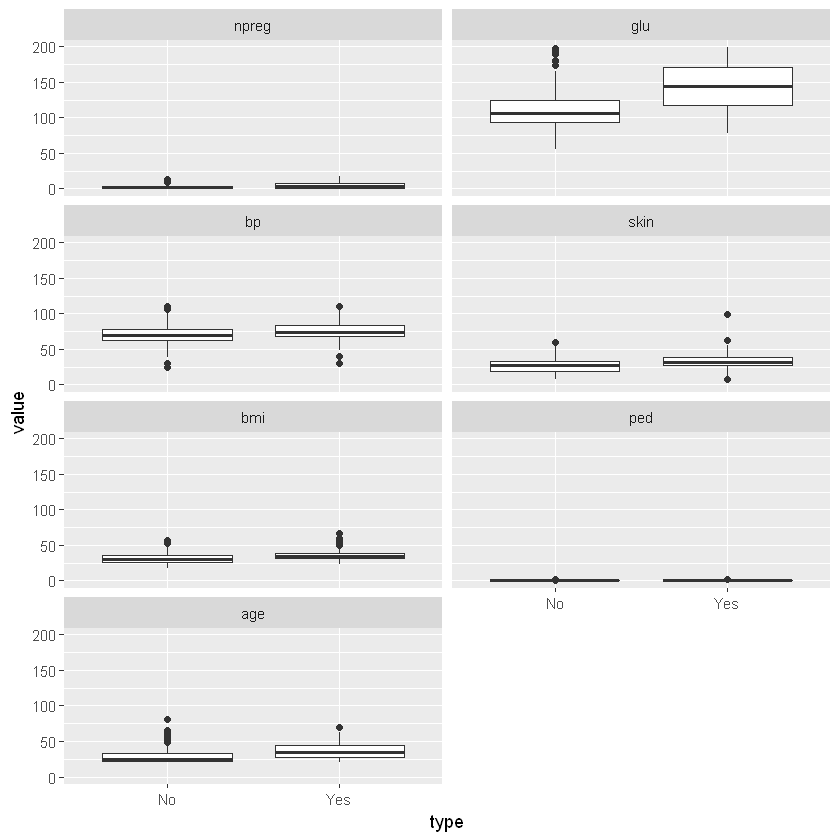

In [79]:
ggplot (pima.melt, aes(x=type, y=value))+
geom_boxplot()+ facet_wrap(~variable, ncol=2)

In [83]:
pima.scale<-data.frame(scale(pima[,-8]))  ; str(pima.scale)  # target 빼고 스케일링 함   

'data.frame':	532 obs. of  7 variables:
 $ npreg: num  0.448 1.052 0.448 -1.062 -1.062 ...
 $ glu  : num  -1.13 2.386 -1.42 1.418 -0.453 ...
 $ bp   : num  -0.285 -0.122 0.852 0.365 -0.935 ...
 $ skin : num  -0.112 0.363 1.123 1.313 -0.397 ...
 $ bmi  : num  -0.391 -1.132 0.423 2.181 -0.943 ...
 $ ped  : num  -0.403 -0.987 -1.007 -0.708 -1.074 ...
 $ age  : num  -0.708 2.173 0.315 -0.522 -0.801 ...


In [85]:
pima.scale$type <- pima$type
str(pima$type)

 Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 1 1 2 ...


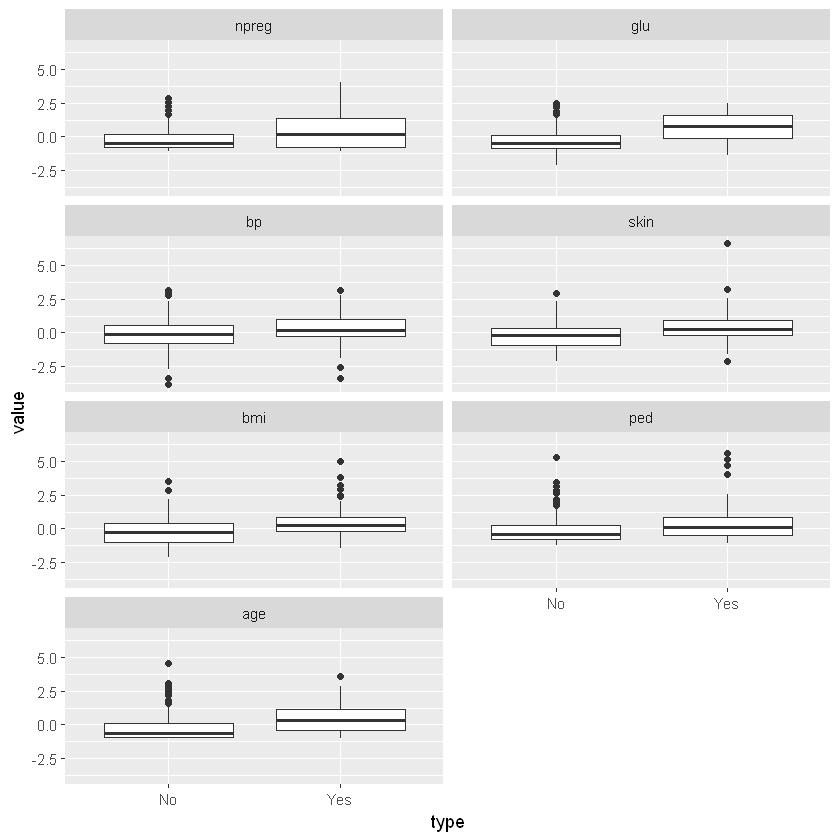

In [87]:
pima.scale.melt<- melt(pima.scale, id.var="type")
ggplot(data=pima.scale.melt, aes(x=type, y=value))+ geom_boxplot() + facet_wrap(~variable, ncol=2)


In [88]:
cor(pima.scale[-8])   #파라미터가 제대로 조정됨->문제가 아님

,npreg,glu,bp,skin,bmi,ped,age
npreg,1.000000000,0.1253296,0.204663421,0.09508511,0.008576282,0.007435104,0.64074687
glu,0.125329647,1.0000000,0.219177950,0.22659042,0.247079294,0.165817411,0.27890711
bp,0.204663421,0.2191779,1.000000000,0.22607244,0.307356904,0.008047249,0.34693872
skin,0.095085114,0.2265904,0.226072440,1.00000000,0.647422386,0.118635569,0.16133614
bmi,0.008576282,0.2470793,0.307356904,0.64742239,1.000000000,0.151107136,0.07343826
ped,0.007435104,0.1658174,0.008047249,0.11863557,0.151107136,1.000000000,0.07165413
age,0.640746866,0.2789071,0.346938723,0.16133614,0.073438257,0.071654133,1.00000000


In [89]:
table(pima.scale$type)


 No Yes 
355 177 

In [92]:
ind<-sample(1:nrow(pima.scale), nrow(pima.scale)*0.7, replace=FALSE)
train<-pima.scale[ind,]
test<-pima.scale[-ind,]

In [93]:
str(train); str(test)

'data.frame':	372 obs. of  8 variables:
 $ npreg: num  1.05 -0.76 0.75 -0.76 -0.76 ...
 $ glu  : num  1.87 -0.775 -1.324 0.225 -1.098 ...
 $ bp   : num  1.909 -0.285 -0.447 -1.909 0.528 ...
 $ skin : num  0.1727 -0.7775 0.0777 1.503 -0.2074 ...
 $ bmi  : num  0.19 -0.827 -0.972 1.106 0.248 ...
 $ ped  : num  -0.984 1.718 -0.551 0.319 -1.167 ...
 $ age  : num  2.638 -0.893 0.872 -0.708 -0.893 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 1 ...
'data.frame':	160 obs. of  8 variables:
 $ npreg: num  -1.062 -0.76 0.146 2.259 -1.062 ...
 $ glu  : num  -0.453 -1.13 -0.711 0.709 0.58 ...
 $ bp   : num  -0.935 -0.447 0.365 1.827 -0.772 ...
 $ skin : num  -0.397 2.168 -1.348 0.363 -1.158 ...
 $ bmi  : num  -0.943 1.222 -1.408 0.539 -1.568 ...
 $ ped  : num  -1.074 1.202 -0.813 -0.723 -0.859 ...
 $ age  : num  -0.801 -0.243 -0.986 1.801 -0.986 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 2 2 1 ...


In [98]:
idx<-sample(2, nrow(pima.scale), replace=TRUE, prob=c(0.7, 0.3))
train2<-pima.scale[idx==1,]
test2<-pima.scale[idx==2, ]
str(train2) ; str(test2)


'data.frame':	375 obs. of  8 variables:
 $ npreg: num  1.052 0.448 -1.062 -1.062 0.448 ...
 $ glu  : num  2.386 -1.42 1.418 -0.453 -0.775 ...
 $ bp   : num  -0.122 0.852 0.365 -0.935 0.365 ...
 $ skin : num  0.363 1.123 1.313 -0.397 -0.207 ...
 $ bmi  : num  -1.132 0.423 2.181 -0.943 0.394 ...
 $ ped  : num  -0.987 -1.007 -0.708 -1.074 -0.363 ...
 $ age  : num  2.173 0.315 -0.522 -0.801 1.894 ...
 $ type : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 1 1 2 2 1 ...
'data.frame':	157 obs. of  8 variables:
 $ npreg: num  0.448 -0.156 -0.76 2.561 2.259 ...
 $ glu  : num  -1.13 0.676 2.193 -0.936 0.709 ...
 $ bp   : num  -0.285 0.69 -0.935 -0.772 1.827 ...
 $ skin : num  -0.112 -1.348 -0.587 -2.108 0.363 ...
 $ bmi  : num  -0.391 -0.0712 -0.4055 -0.7688 0.5391 ...
 $ ped  : num  -0.403 -0.879 -0.305 1.228 -0.723 ...
 $ age  : num  -0.708 2.916 2.545 1.151 1.801 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 2 2 2 1 1 2 1 2 ...


In [102]:
grid1<-expand.grid(.k=seq(2,20,by=1))#k의 입력값을 위한 격자망
grid1


.k
2
3
4
5
6
7
8
9
10
11


In [104]:
control= trainControl(method="cv") #caret 매개변수 선택

In [106]:
set.seed(123)
knn.train<- train(type~., train, method="knn", trControl=control, tuneGrid=grid1)   #caret 최적k 구하기
knn.train

k-Nearest Neighbors 

372 samples
  7 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 335, 335, 334, 335, 334, 336, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.7209380  0.3680320
   3  0.7049471  0.3207223
   4  0.7237316  0.3552936
   5  0.7077960  0.3255223
   6  0.7398095  0.4013436
   7  0.7344713  0.3864556
   8  0.7321993  0.3787563
   9  0.7482693  0.4076722
  10  0.7425004  0.4043236
  11  0.7506085  0.4202276
  12  0.7481231  0.4098386
  13  0.7639837  0.4473478
  14  0.7584361  0.4283687
  15  0.7530307  0.4153831
  16  0.7503951  0.4097321
  17  0.7557334  0.4190032
  18  0.7529595  0.4057878
  19  0.7531018  0.4070139
  20  0.7635570  0.4308925

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.

In [108]:
knn.test<- knn(train[,-8], test[, -8], train[,8], k=17)
table(knn.test, test$type)

        
knn.test No Yes
     No  91  22
     Yes 16  31

In [115]:
?confusionMatrix

confusionMatrix             package:caret              R Documentation

_C_r_e_a_t_e _a _c_o_n_f_u_s_i_o_n _m_a_t_r_i_x

_D_e_s_c_r_i_p_t_i_o_n:

     Calculates a cross-tabulation of observed and predicted classes
     with associated statistics.

_U_s_a_g_e:

     confusionMatrix(data, ...)
     
     ## Default S3 method:
     confusionMatrix(
       data,
       reference,
       positive = NULL,
       dnn = c("Prediction", "Reference"),
       prevalence = NULL,
       mode = "sens_spec",
       ...
     )
     
     ## S3 method for class 'table'
     confusionMatrix(
       data,
       positive = NULL,
       prevalence = NULL,
       mode = "sens_spec",
       ...
     )
     
_A_r_g_u_m_e_n_t_s:

    data: a factor of predicted classes (for the default method) or an
          object of class 'table'.

     ...: options to be passed to 'table'. NOTE: do not include 'dnn'
          here

reference: a factor of classes to be used as the true results

positive: an optional character string for the factor level that
          corresponds to a "positive" result (if that makes sense for
          your data). If there are only two factor levels, the first
          level will be used as the "positive" result. When 'mode =
          "prec_recall"', 'positive' is the same value used for
          'relevant' for functions 'precision', 'recall', and
          'F_meas.table'.

     dnn: a character vector of dimnames for the table

prevalence: a numeric value or matrix for the rate of the "positive"
          class of the data. When 'data' has two levels, 'prevalence'
          should be a single numeric value. Otherwise, it should be a
          vector of numeric values with elements for each class. The
          vector should have names corresponding to the classes.

    mode: a single character string either "sens_spec", "prec_recall",
          or "everything"

_D_e_t_a_i_l_s:

     The functions requires that the factors have exactly the same
     levels.

     For two class problems, the sensitivity, specificity, positive
     predictive value and negative predictive value is calculated using
     the 'positive' argument. Also, the prevalence of the "event" is
     computed from the data (unless passed in as an argument), the
     detection rate (the rate of true events also predicted to be
     events) and the detection prevalence (the prevalence of predicted
     events).

     Suppose a 2x2 table with notation

                  Reference           
       Predicted    Event    No Event 
           Event      A         B     
        No Event      C         D     
      
     The formulas used here are:

                            Sensitivity = A/(A+C)                       
     
                            Specificity =D/(B+D)                        
     
                        Prevalence = (A+C)/(A+B+C+D)                    
     
     PPV = (sensitivity *
     prevalence)/((sensitivity*prevalence) + ((1-specificity)*(1-prevalence)))
     
     NPV = (specificity * (1-prevalence))/(((1-sensitivity)*prevalence) +
     ((specificity)*(1-prevalence)))
     
                        Detection Rate = A/(A+B+C+D)                    
     
                   Detection Prevalence = (A+B)/(A+B+C+D)               
     
               Balanced Accuracy =(sensitivity+specificity)/2           
     
                             Precision = A/(A+B)                        
     
                              Recall = A/(A+C)                          
     
        F1 =(1+beta^2)*precision*recall/((beta^2 * precision)+recall)   
     
     where 'beta = 1' for this function.

     See the references for discussions of the first five formulas.

     For more than two classes, these results are calculated comparing
     each factor level to the remaining levels (i.e. a "one versus all"
     approach).

     The overall accuracy and unweighted Kappa statistic are
     calculated.

In [109]:
confusionMatrix(  knn.test    , test[,8])

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  91  22
       Yes 16  31
                                          
               Accuracy : 0.7625          
                 95% CI : (0.6889, 0.8261)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 0.006336        
                                          
                  Kappa : 0.4482          
                                          
 Mcnemar's Test P-Value : 0.417304        
                                          
            Sensitivity : 0.8505          
            Specificity : 0.5849          
         Pos Pred Value : 0.8053          
         Neg Pred Value : 0.6596          
             Prevalence : 0.6687          
         Detection Rate : 0.5687          
   Detection Prevalence : 0.7063          
      Balanced Accuracy : 0.7177          
                                          
       'Positive' Class : No              
                                 

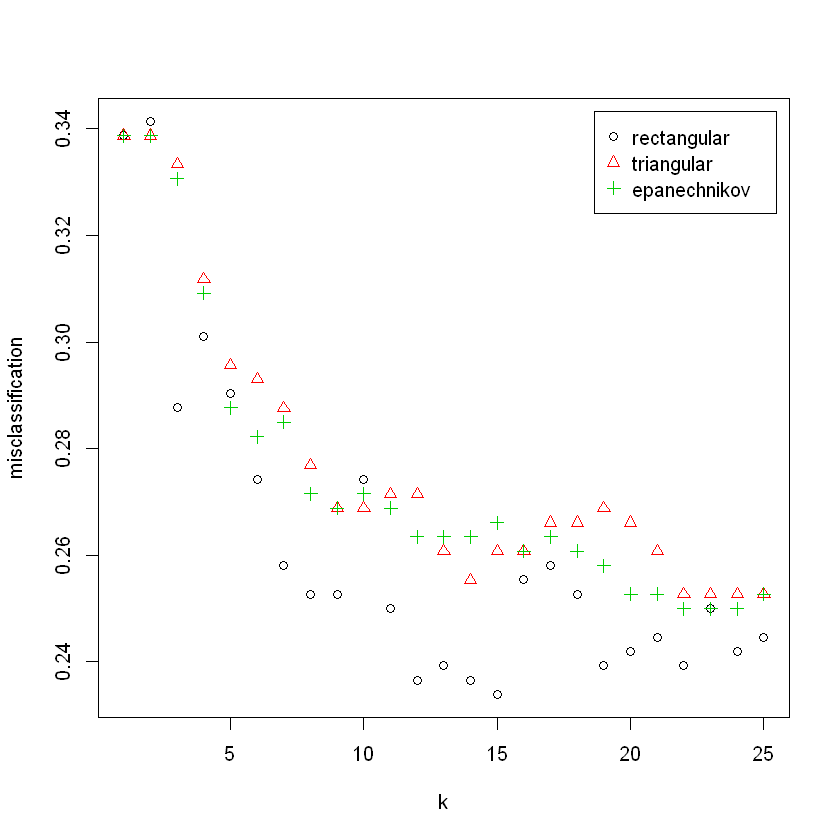

In [112]:
set.seed(123)
kknn.train<-train.kknn(type~., train, kmax=25,distance=2, kernel=c("rectangular", "triangular", "epanechnikov") )
plot(kknn.train)

In [113]:
kknn.train


Call:
train.kknn(formula = type ~ ., data = train, kmax = 25, distance = 2,     kernel = c("rectangular", "triangular", "epanechnikov"))

Type of response variable: nominal
Minimal misclassification: 0.233871
Best kernel: rectangular
Best k: 15

In [114]:
pred.kknn<-predict(kknn.train, test)
confusionMatrix(pred.kknn, test[,8])

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  92  22
       Yes 15  31
                                          
               Accuracy : 0.7688          
                 95% CI : (0.6956, 0.8317)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 0.003774        
                                          
                  Kappa : 0.4601          
                                          
 Mcnemar's Test P-Value : 0.323940        
                                          
            Sensitivity : 0.8598          
            Specificity : 0.5849          
         Pos Pred Value : 0.8070          
         Neg Pred Value : 0.6739          
             Prevalence : 0.6687          
         Detection Rate : 0.5750          
   Detection Prevalence : 0.7125          
      Balanced Accuracy : 0.7224          
                                          
       'Positive' Class : No              
                                 

In [ ]:
set.seed(123)
kknn.train <- train.kknn(type ~ ., data = train, 
                         kmax = 25, distance = 2, 
                         kernel = c("rectangular", "triangular", "epanechnikov")
#k쵀대값, 거리=1(유클리드),2(절댓값합)
plot(kknn.train)
kknn.train
kknn.pred <- predict(kknn.train, newdata = test)
table(kknn.pred, test$type)


## 서포트벡터머신 모형화 

In [116]:
library(e1071)  #SVM
library(kernlab) #SVM피처 선택에 도움   ksvm 
library(pROC) # SVM 피처 선택에 도움

Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:h2o':

    var

The following objects are masked from 'package:stats':

    cov, smooth, var



In [170]:
set.seed(123)
linear.tune<- tune.svm(type~., data=train, kernel="linear", cost=c(0.001, 0.01, 0.1, 5, 10))
summary(linear.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
 0.01

- best performance: 0.2253201 

- Detailed performance results:
   cost     error dispersion
1 1e-03 0.3328592 0.07520531
2 1e-02 0.2253201 0.05398517
3 1e-01 0.2308677 0.05814214
4 5e+00 0.2335704 0.05211775
5 1e+01 0.2335704 0.05211775


In [118]:
str(linear.tune)

List of 8
 $ best.parameters :'data.frame':	1 obs. of  1 variable:
  ..$ cost: num 0.01
  ..- attr(*, "out.attrs")=List of 2
  .. ..$ dim     : Named int 5
  .. .. ..- attr(*, "names")= chr "cost"
  .. ..$ dimnames:List of 1
  .. .. ..$ cost: chr [1:5] "cost=1e-03" "cost=1e-02" "cost=1e-01" "cost=5e+00" ...
 $ best.performance: num 0.225
 $ method          : chr "svm"
 $ nparcomb        : int 5
 $ train.ind       :List of 10
  ..$ (0.629,38.1]: int [1:334] 166 217 290 69 72 76 63 141 210 363 ...
  ..$ (38.1,75.2] : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (75.2,112]  : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (112,149]   : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (149,186]   : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (186,224]   : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (224,261]   : int [1:335] 179 14 195 306 118 299 229 244 371 153 ...
  ..$ (261,298]   : int [1:335] 179 14 195 306 11

In [171]:
pred.linear<- predict( linear.tune$best.model , test)

In [120]:
confusionMatrix(pred.linear, test$type)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  99  22
       Yes  8  31
                                          
               Accuracy : 0.8125          
                 95% CI : (0.7433, 0.8698)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 3.856e-05       
                                          
                  Kappa : 0.5466          
                                          
 Mcnemar's Test P-Value : 0.01762         
                                          
            Sensitivity : 0.9252          
            Specificity : 0.5849          
         Pos Pred Value : 0.8182          
         Neg Pred Value : 0.7949          
             Prevalence : 0.6687          
         Detection Rate : 0.6188          
   Detection Prevalence : 0.7562          
      Balanced Accuracy : 0.7551          
                                          
       'Positive' Class : No              
                                 

In [123]:
(99+31)/( 99 + 22 + 8 +31)

[1] 0.8125

In [124]:
#SVM with e1071; tune the poly only
set.seed(123)
poly.tune<-tune.svm(type~., data=train, kernel="polynomial", degree=c(3,4,5), coef0=c(0.1, 0.5, 1, 2, 3, 4))
summary(poly.tune)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 degree coef0
      4     1

- best performance: 0.247155 

- Detailed performance results:
   degree coef0     error dispersion
1       3   0.1 0.2551209 0.05112128
2       4   0.1 0.2794452 0.04679591
3       5   0.1 0.2580370 0.05095140
4       3   0.5 0.2577525 0.05050198
5       4   0.5 0.2578947 0.05291403
6       5   0.5 0.2607397 0.04205493
7       3   1.0 0.2497866 0.05241520
8       4   1.0 0.2471550 0.07072851
9       5   1.0 0.2738976 0.08062815
10      3   2.0 0.2525605 0.04988188
11      4   2.0 0.2498578 0.08857378
12      5   2.0 0.2978663 0.08102477
13      3   3.0 0.2551209 0.04933760
14      4   3.0 0.2578236 0.08651490
15      5   3.0 0.3272404 0.10012853
16      3   4.0 0.2524182 0.04747560
17      4   4.0 0.2578236 0.07761384
18      5   4.0 0.3113798 0.09290467


In [139]:
pred.poly<-predict(poly.tune$best.model, test)
confusionMatrix(pred.poly, test[,8], positive='Yes')   # 성능 안좋아짐


Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  91  25
       Yes 16  28
                                          
               Accuracy : 0.7438          
                 95% CI : (0.6688, 0.8094)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 0.02487         
                                          
                  Kappa : 0.3957          
                                          
 Mcnemar's Test P-Value : 0.21152         
                                          
            Sensitivity : 0.5283          
            Specificity : 0.8505          
         Pos Pred Value : 0.6364          
         Neg Pred Value : 0.7845          
             Prevalence : 0.3312          
         Detection Rate : 0.1750          
   Detection Prevalence : 0.2750          
      Balanced Accuracy : 0.6894          
                                          
       'Positive' Class : Yes             
                                 

In [141]:
str(test)

'data.frame':	160 obs. of  8 variables:
 $ npreg: num  -1.062 -0.76 0.146 2.259 -1.062 ...
 $ glu  : num  -0.453 -1.13 -0.711 0.709 0.58 ...
 $ bp   : num  -0.935 -0.447 0.365 1.827 -0.772 ...
 $ skin : num  -0.397 2.168 -1.348 0.363 -1.158 ...
 $ bmi  : num  -0.943 1.222 -1.408 0.539 -1.568 ...
 $ ped  : num  -1.074 1.202 -0.813 -0.723 -0.859 ...
 $ age  : num  -0.801 -0.243 -0.986 1.801 -0.986 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 2 2 1 ...


In [143]:
library(e1071)

In [158]:
?tune.svm

tune.wrapper {e1071},R Documentation
"formula, x, y, data",formula and data arguments of function to be tuned.
predict.func,predicting function.
na.action,function handling missingness.
"minsplit, minbucket, cp, maxcompete, maxsurrogate, usesurrogate, xval, surrogatestyle, maxdepth",rpart parameters.
"degree, gamma, coef0, cost, nu, class.weights, epsilon",svm parameters.
"k, l",knn parameters.
"mtry, nodesize, ntree",randomForest parameters.
"size, decay, trace",parameters passed to nnet.
tunecontrol,"object of class ""tune.control"" containing tuning parameters."
...,Further parameters passed to tune.


In [159]:
cost<- c(1, seq(from = 5, to = 40, by = 5))

accu <- sapply(cost, function(x) {
        set.seed(123)
        m<-tune.svm(type~., data=train, kernel="sigmoid", coef0=x    )
        pred <- predict(m, test)
        agree <- ifelse(pred == test$type, 1, 0)
        accu <- sum(agree) / nrow(test$type)
        return (accu)
        })
  

ERROR: Error in UseMethod("predict"): 클래스 "tune"의 객체에 적용된 'predict'에 사용할수 있는 메소드가 없습니다


In [ ]:
plot(cost, accu, type = "b")

In [134]:
str(train)

'data.frame':	372 obs. of  8 variables:
 $ npreg: num  1.05 -0.76 0.75 -0.76 -0.76 ...
 $ glu  : num  1.87 -0.775 -1.324 0.225 -1.098 ...
 $ bp   : num  1.909 -0.285 -0.447 -1.909 0.528 ...
 $ skin : num  0.1727 -0.7775 0.0777 1.503 -0.2074 ...
 $ bmi  : num  0.19 -0.827 -0.972 1.106 0.248 ...
 $ ped  : num  -0.984 1.718 -0.551 0.319 -1.167 ...
 $ age  : num  2.638 -0.893 0.872 -0.708 -0.893 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 1 ...


In [154]:
str(train)

'data.frame':	372 obs. of  8 variables:
 $ npreg: num  1.05 -0.76 0.75 -0.76 -0.76 ...
 $ glu  : num  1.87 -0.775 -1.324 0.225 -1.098 ...
 $ bp   : num  1.909 -0.285 -0.447 -1.909 0.528 ...
 $ skin : num  0.1727 -0.7775 0.0777 1.503 -0.2074 ...
 $ bmi  : num  0.19 -0.827 -0.972 1.106 0.248 ...
 $ ped  : num  -0.984 1.718 -0.551 0.319 -1.167 ...
 $ age  : num  2.638 -0.893 0.872 -0.708 -0.893 ...
 $ type : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 1 ...


In [155]:
#tune the rbf
set.seed(123)
rbf.tune<-tune.svm(type~., data=train, kernel="radial", gamma=c(0.1, 0.5, 1, 2, 3, 4))
summary(rbf.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
   0.1

- best performance: 0.2523471 

- Detailed performance results:
  gamma     error dispersion
1   0.1 0.2523471 0.06132776
2   0.5 0.2658606 0.06709869
3   1.0 0.2955192 0.09778431
4   2.0 0.3435277 0.08293300
5   3.0 0.3328592 0.07075692
6   4.0 0.3328592 0.07520531


In [156]:
set.seed(123)
rbf.tune2<-tune.svm(type~., data=train, kernel="radial", gamma=c(0.1, 0.5, 1, 2, 3, 4), coef0=c(0.1, 0.5, 1, 2, 3, 4))
summary(rbf.tune2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0
   0.1   0.1

- best performance: 0.2523471 

- Detailed performance results:
   gamma coef0     error dispersion
1    0.1   0.1 0.2523471 0.06132776
2    0.5   0.1 0.2658606 0.06709869
3    1.0   0.1 0.2955192 0.09778431
4    2.0   0.1 0.3435277 0.08293300
5    3.0   0.1 0.3328592 0.07075692
6    4.0   0.1 0.3328592 0.07520531
7    0.1   0.5 0.2523471 0.06132776
8    0.5   0.5 0.2658606 0.06709869
9    1.0   0.5 0.2955192 0.09778431
10   2.0   0.5 0.3435277 0.08293300
11   3.0   0.5 0.3328592 0.07075692
12   4.0   0.5 0.3328592 0.07520531
13   0.1   1.0 0.2523471 0.06132776
14   0.5   1.0 0.2658606 0.06709869
15   1.0   1.0 0.2955192 0.09778431
16   2.0   1.0 0.3435277 0.08293300
17   3.0   1.0 0.3328592 0.07075692
18   4.0   1.0 0.3328592 0.07520531
19   0.1   2.0 0.2523471 0.06132776
20   0.5   2.0 0.2658606 0.06709869
21   1.0   2.0 0.2955192 0.09778431
22   2.0   2.0 0.343527

In [161]:
pred.rbf<-predict(rbf.tune$best.model, test)
confusionMatrix(pred.rbf, test[,8])

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  92  18
       Yes 15  35
                                          
               Accuracy : 0.7938          
                 95% CI : (0.7227, 0.8536)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 0.0003407       
                                          
                  Kappa : 0.5277          
                                          
 Mcnemar's Test P-Value : 0.7277235       
                                          
            Sensitivity : 0.8598          
            Specificity : 0.6604          
         Pos Pred Value : 0.8364          
         Neg Pred Value : 0.7000          
             Prevalence : 0.6687          
         Detection Rate : 0.5750          
   Detection Prevalence : 0.6875          
      Balanced Accuracy : 0.7601          
                                          
       'Positive' Class : No              
                                 

In [172]:
#tune the sigmoid
set.seed(123)
sigmoid.tune<-tune.svm(type~., data=train, kernel="sigmoid", gamma=c(0.1, 0.5, 1,2,3,4), coef0 = c(0.1, 0.5, 1, 2, 3, 4))

In [164]:
summary(sigmoid.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0
   0.1   0.1

- best performance: 0.2229018 

- Detailed performance results:
   gamma coef0     error dispersion
1    0.1   0.1 0.2229018 0.05860528
2    0.5   0.1 0.3169275 0.07454714
3    1.0   0.1 0.3275960 0.06938948
4    2.0   0.1 0.3384780 0.07628827
5    3.0   0.1 0.3438122 0.07764059
6    4.0   0.1 0.3493599 0.07571836
7    0.1   0.5 0.2766714 0.04423798
8    0.5   0.5 0.3062589 0.08172612
9    1.0   0.5 0.3305121 0.05738301
10   2.0   0.5 0.3492888 0.06724232
11   3.0   0.5 0.3332148 0.06559450
12   4.0   0.5 0.3546230 0.06306770
13   0.1   1.0 0.2901849 0.05855424
14   0.5   1.0 0.3359175 0.03742256
15   1.0   1.0 0.3279516 0.05931762
16   2.0   1.0 0.3522760 0.06486276
17   3.0   1.0 0.3493599 0.06152541
18   4.0   1.0 0.3628023 0.06569827
19   0.1   2.0 0.2255334 0.03623273
20   0.5   2.0 0.3816501 0.06252709
21   1.0   2.0 0.3788051 0.03820463
22   2.0   2.0 0.322546

In [173]:
pred.sigmoid<-predict(sigmoid.tune$best.model, test)

In [175]:

confusionMatrix(pred.sigmoid, test[,8], positive="Yes")
confusionMatrix(pred.linear, test[,8], positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  95  20
       Yes 12  33
                                         
               Accuracy : 0.8            
                 95% CI : (0.7296, 0.859)
    No Information Rate : 0.6688         
    P-Value [Acc > NIR] : 0.0001711      
                                         
                  Kappa : 0.5307         
                                         
 Mcnemar's Test P-Value : 0.2159249      
                                         
            Sensitivity : 0.6226         
            Specificity : 0.8879         
         Pos Pred Value : 0.7333         
         Neg Pred Value : 0.8261         
             Prevalence : 0.3312         
         Detection Rate : 0.2062         
   Detection Prevalence : 0.2812         
      Balanced Accuracy : 0.7552         
                                         
       'Positive' Class : Yes            
                                         

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  99  22
       Yes  8  31
                                          
               Accuracy : 0.8125          
                 95% CI : (0.7433, 0.8698)
    No Information Rate : 0.6688          
    P-Value [Acc > NIR] : 3.856e-05       
                                          
                  Kappa : 0.5466          
                                          
 Mcnemar's Test P-Value : 0.01762         
                                          
            Sensitivity : 0.5849          
            Specificity : 0.9252          
         Pos Pred Value : 0.7949          
         Neg Pred Value : 0.8182          
             Prevalence : 0.3312          
         Detection Rate : 0.1938          
   Detection Prevalence : 0.2437          
      Balanced Accuracy : 0.7551          
                                          
       'Positive' Class : Yes             
                                 

In [180]:
set.seed(123)
rfeCNTL<-rfeControl(functions=lrFuncs, method="cv", number=10)   # caret, 교차 검증 방법 명시
svm.features<-rfe(train[,1:7], train[,8], sizes=c(7,6,5,4), rfeControl=rfeCNTL, method="svmLinear") #반복적 피처 선택 실행
svm.features    # 변수 5개일때 accuracy 제일 높음 


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         4   0.7642 0.4406    0.07528  0.1766         
         5   0.7667 0.4509    0.06124  0.1372        *
         6   0.7586 0.4319    0.05546  0.1219         
         7   0.7559 0.4246    0.05881  0.1307         

The top 5 variables (out of 5):
   glu, bmi, age, ped, npreg


In [182]:
svm5<-svm(type~ glu+ped+ npreg + bmi + age, train, kernel="linear")
pred.svm5<-predict(svm5, test[c(1,2,5,6,7)])   # !!주의
confusionMatrix(pred.svm5, test[,8], positive="Yes")

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  95  20
       Yes 12  33
                                         
               Accuracy : 0.8            
                 95% CI : (0.7296, 0.859)
    No Information Rate : 0.6688         
    P-Value [Acc > NIR] : 0.0001711      
                                         
                  Kappa : 0.5307         
                                         
 Mcnemar's Test P-Value : 0.2159249      
                                         
            Sensitivity : 0.6226         
            Specificity : 0.8879         
         Pos Pred Value : 0.7333         
         Neg Pred Value : 0.8261         
             Prevalence : 0.3312         
         Detection Rate : 0.2062         
   Detection Prevalence : 0.2812         
      Balanced Accuracy : 0.7552         
                                         
       'Positive' Class : Yes            
                                         

In [ ]:

svm.5 <- svm(type ~ glu + ped + npreg + bmi + age, 
             data = train, 
             kernel = "linear")
svm.5.predict = predict(svm.5, newdata=test[c(1,2,5,6,7)])
table(svm.5.predict, test$type)


## adp실기책 svm

In [185]:
setwd("C:/Users/alsdu/Downloads/PART 05 실습용 데이터")
credit<-read.table("credit_final.csv", header=T, sep=',')
idx<-sample(3, nrow(credit), replace=T, prob=c(0.5, 0.3, 0.2))
train<-credit[idx==1,]
validation<-credit[idx==2,]
test<-credit[idx==3,]

In [196]:
tune.svm<-tune.svm(credit.rating~., data=credit, gamma = 10^(-6:-1), cost = 10^(1:2))

In [197]:
summary(tune.svm)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.01   10

- best performance: 0.1770652 

- Detailed performance results:
   gamma cost     error dispersion
1  1e-06   10 0.2740612 0.03374569
2  1e-05   10 0.2695580 0.03329187
3  1e-04   10 0.2442154 0.03132812
4  1e-03   10 0.2150317 0.02978270
5  1e-02   10 0.1770652 0.03943902
6  1e-01   10 0.1946432 0.03779258
7  1e-06  100 0.2695661 0.03330019
8  1e-05  100 0.2442731 0.03126381
9  1e-04  100 0.2250110 0.03052894
10 1e-03  100 0.1815764 0.03496832
11 1e-02  100 0.2037425 0.04458852
12 1e-01  100 0.2048385 0.03857783


In [233]:
svm.model<-svm(credit.rating~., 
               data=train,
               kernel="radial",
               gamma=0.01,
               cost=10)

summary(svm.model)

pred.svm<-predict(svm.model,test,type="class")                          #test 데이터로 예측값과 정확도를 확인.


Call:
svm(formula = credit.rating ~ ., data = train, kernel = "radial", 
    gamma = 0.01, cost = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  409






In [237]:
table(pred.svm,test[,1])        

                      
pred.svm               0 1
  -0.496664140333123   1 0
  -0.00790331889503049 1 0
  0.0454917246252952   0 1
  0.0549839814085035   1 0
  0.0685752008271824   1 0
  0.10242224566308     0 1
  0.107964737421451    1 0
  0.133519365252856    1 0
  0.142193433038159    1 0
  0.151775882185284    1 0
  0.167941928635832    1 0
  0.225779819560729    0 1
  0.243924294886474    0 1
  0.250937301480006    1 0
  0.2753396969359      1 0
  0.279727228094879    1 0
  0.280070652787014    1 0
  0.299860828974848    1 0
  0.32005067879656     1 0
  0.339002383378541    0 1
  0.339431705029509    0 1
  0.347643283108821    1 0
  0.34791978130612     1 0
  0.350028355129783    0 1
  0.35078629907398     0 1
  0.392549548707817    1 0
  0.400077282948064    0 1
  0.401759242466683    0 1
  0.409730017999546    0 1
  0.414657798474298    1 0
  0.417676741267585    1 0
  0.444864574650111    1 0
  0.453925734099032    1 0
  0.460035504567447    1 0
  0.492091812032837    0 1
  0.4

In [239]:
table( test[,1] ) 


  0   1 
 58 138 

In [236]:
confusionMatrix(data=pred.svm, test[,1], positive='1')


ERROR: Error: `data` and `reference` should be factors with the same levels.


In [ ]:
pred.svm<-predict(svm.model,test,type="class")                          #test 데이터로 예측값과 정확도를 확인.
table(pred.svm,test[,1])                      


confusionMatrix(data=pred.svm, test[,1], positive='1')

pred.svm.roc<-prediction(as.numeric(pred.svm),as.numeric(test[,1]))

plot(performance(pred.svm.roc,"tpr","fpr"))          #ROC Curve 작성.

abline(a=0,b=1,lty=2,col="black")

In [ ]:
# 1) svm 모델 만들기
#
# svm(formula, 
#     data, 
#     kernel,        #훈련과 예측에 사용되는 커널로, "radial","linear","polynomial","sigmoid"가 있음
#                    #실제 문제에서 커널의 선택이 결과의 정확도에 큰 영향을 주지 않음
#     gamma,         #초평면의 기울기, default=1/(데이터 차원)
#     cost,          #과적합을 막는 정도, default=1
#     ...)


# 2) 파라미터 최적값 찾기 : svm에서는 gamma, cost 값을 가짐. cost는 과적합을 막는 정도를 지정하는 파라미터이며,
#                           gamma는 초평면의 기울기를 의미.
# tune.svm(formula, 
#          data, 
#          gamma,           #gamma값을 입력
#          cost)            #cost값을 입력

# ex) credit 데이터로 파라미터 최적값을 찾아 보자.

setwd("C:/Users/alsdu/Downloads/PART 05 실습용 데이터")
credit<-read.table("credit_final.csv", header=T, sep=',')
idx<-sample(3, nrow(credit), replace=T, prob=c(0.5, 0.3, 0.2))
train<-credit[idx==1,]
validation<-credit[idx==2,]
test<-credit[idx==3,]
install.packages("e1071")
library(e1071)

tune.svm(credit.rating~., 
         data=credit, 
         gamma = 10^(-6:-1),        
         cost = 10^(1:2))          

svm.model<-svm(credit.rating~., 
               data=train,
               kernel="radial",
               gamma=0.01,
               cost=10)

summary(svm.model)

pred.svm<-predict(svm.model,test,type="class")                          #test 데이터로 예측값과 정확도를 확인.
table(pred.svm,test[,1])                      

confusionMatrix(data=pred.svm, reference=test[,1], positive='1')

pred.svm.roc<-prediction(as.numeric(pred.svm),as.numeric(test[,1]))
plot(performance(pred.svm.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")                
performance(pred.svm.roc,"auc")@y.values             #auc값이 50%로 성능이 좋지않음.
